## **Recommend - Explore**

The recommend functionality of twinLab can help you decide what the next best samples to take are. In this Notebook, we'll take a particular look at "explore" and how this can help you reduce the overall uncertainty in your emulator. 

Getting additional points from recommend using the `"explore"` keyword argument helps you find the next best point in order to reduce your emulator's overall area of uncertainty. Minimizing your emulator's uncertainty in this way means that you can then go on to get the accompanying y-values for these points by inputting your x-values into your model, confident that these points would reduce your emulator's overall area of uncertainty. With these in hand, you can then retrain your emulator and improve your understanding of which experimental choices or simulation path to go down. 

In this Jupyter Notebook you will: 

1. [Load an example dataset, and train your emulator.](#1-get-and-train-an-example-dataset)
2. [Predict points with your emulator.](#2-predict-your-trained-emulator)
3. [Find new data points from your trained emulator with `Emulator.recommend`.](#3-use-recommend-to-explore-your-emulator) 
4. [Visualise your results and their uncertainty.](#4-visualise-your-recommend-results)
5. [Explore how to make the most of using your `Emulator.recommend` parameters.](#5-explore-the-parameters) 


Start by importing all the necessary packages you need for this tutorial.

In [1]:
import twinlab as tl


          ====== TwinLab Client Initialisation ======
          Version     : 2.10.0
          User        : alexander@digilab.co.uk
          Server      : http://localhost:8000
          Environment : /Users/mead/digiLab/twinLab/tutorials/.env



### **1. Get and train an example dataset**

In this tutorial, you'll use the example dataset, "quickstart", which has a single input variable "x" and a single output, or response, variable "y". You might see "input" features also referred to as feature, predictor, or parameter in data science circles. 

In [2]:
# Download the example dataset
df = tl.load_example_dataset("quickstart")

# Check the dataframe before uploading
display(df)

,x,y
0,0.696469,-0.817374
1,0.286139,0.887656
2,0.226851,0.921553
3,0.551315,-0.326334
4,0.719469,-0.832518
5,0.423106,0.400669
6,0.980764,-0.164966
7,0.684830,-0.960764
8,0.480932,0.340115
9,0.392118,0.845795


Using the `upload` method, you can then upload the `Dataset` to your twinLab cloud account. 

In [3]:
# Intialise a Dataset object and give it a name
dataset = tl.Dataset("quickstart")

# Upload the dataset, passing in the dataframe
dataset.upload(df)

Next, you need to define your emulator. 

In [4]:
# Initialise emulator
emulator_id = "example_emulator"

emulator = tl.Emulator(id=emulator_id)

When you want to train a model, you pass on your training requirements via arguments using a `TrainParams` object. `TrainParams` is a class that contains all the necessary parameters needed to train your model.

The `TrainParams` object has a lot of other parameters to customise your training including dimensionality reduction, type of estimator, automatic model selection and many others. Please refer to [twinLab-docs](https://twinlab.ai/python/reference/parameters.html#api-parameters) for more information.

In [5]:
# Define the training parameters for your emulator
params = tl.TrainParams(train_test_ratio=1.0)

Then, to train your model, you use the `Emulator.train` function, and input your `TrainParams` object as an argument to this function. 

In this example, we will just define the `train_test_ratio` parameter which specifies the amount of data that has to be allocated to emulator training from your entire dataset.

In [6]:
# Train the emulator using the train method
emulator.train(
    dataset=dataset, inputs=["x"], outputs=["y"], params=params, verbose=True
)

Emulator example_emulator has begun training.
0:00:00: Job status: processing
0:00:01: Job status: success
Training of emulator example_emulator is complete!


As you can see, there is a three-word string that gets returned with your job--"train-word1-word2-word3". This is an identifier to make it easy to communicate between yourself and the twinLab team--if ever there's been a problem with your job you can report the job ID to us and we can track it down for you. This kind of identifier will get returned to you anytime you train or use an inference method like predict on your emulator. You can use the identifier yourself to retrieve the results of an inference method you've used and see how long a job is taking to run--we'll be using it at various points throughout this notebook. 

### 2. Predict using your trained emulator

We can use the `Emulator.plot` functionality to plot the mean prediction and the uncertainty band of the emulator.

The `Emulator.plot` function internally uses the `Emulator.predict` function, so we are also predicting by calling this. There are a few arguments that can be passed to the `Emulator.predict` function, which can be done using the `tl.PredictParams` object. Refer to [twinLab Parameter Docs](https://twinlab.ai/python/reference/parameters.html#api-parameters) for more information on the parameter objects.

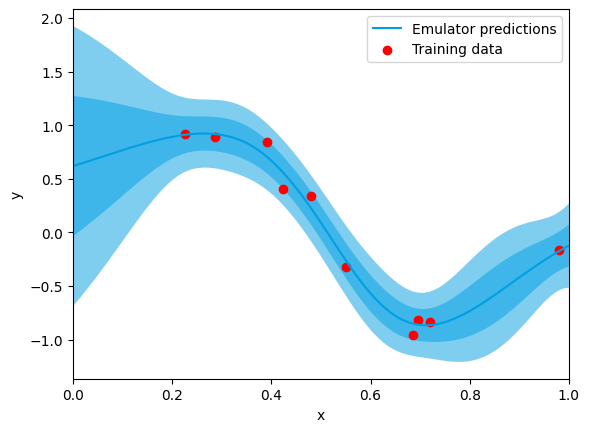

In [7]:
# Plot the trained emulator with the predictions
plt = emulator.plot(x_axis="x", y_axis="y", label="Emulator predictions", x_lim=(0, 1))
# Add on your training data points 
plt.scatter(df["x"], df["y"], color="r", label="Training data",zorder=1)
# Make sure to add a legend
plt.legend()
# Once you show the plot you've finalised it's form!
plt.show()

If you check on the processes associated with your emulator, you can see the prediction that you created when using `emulator.plot`.

In [8]:
emulator.list_processes()

[{'status': 'success',
  'start_time': '2024-07-18T13:14:59.175476+00:00',
  'end_time': '2024-07-18T13:15:00.553842+00:00',
  'process_id': 'predict-camp-fluffy-galliform'}]

You can get the results of the prediction that was made by taking the `'process_id'` generated during the plot function running and running it through `emulator.get_process`.

In [10]:
process_id = "<INSERT-PROCESS-ID-HERE>"
mean, std = emulator.get_process(process_id=process_id,verbose=True)

Mean predictions:
           y
0   0.618116
1   0.632767
2   0.647590
3   0.662558
4   0.677638
..       ...
95 -0.232815
96 -0.203753
97 -0.175723
98 -0.148787
99 -0.122988

[100 rows x 1 columns]
Standard deviation predictions:
           y
0   0.653885
1   0.633612
2   0.612575
3   0.590800
4   0.568322
..       ...
95  0.187721
96  0.183122
97  0.182553
98  0.186733
99  0.195862

[100 rows x 1 columns]
(           y
0   0.618116
1   0.632767
2   0.647590
3   0.662558
4   0.677638
..       ...
95 -0.232815
96 -0.203753
97 -0.175723
98 -0.148787
99 -0.122988

[100 rows x 1 columns],            y
0   0.653885
1   0.633612
2   0.612575
3   0.590800
4   0.568322
..       ...
95  0.187721
96  0.183122
97  0.182553
98  0.186733
99  0.195862

[100 rows x 1 columns])
Process predict-camp-fluffy-galliform results:
(           y
0   0.618116
1   0.632767
2   0.647590
3   0.662558
4   0.677638
..       ...
95 -0.232815
96 -0.203753
97 -0.175723
98 -0.148787
99 -0.122988

[100 rows x 1 columns]

### 3. Use recommend to "explore" your emulator

Optimise your emulator starting with just the default Recommend parameters so you can see how best to use the function. 

If you utilise the default `verbose` keyword argument, and put `wait` as `False`, that can be helpful if you're waiting on a longer job, as you don't need to wait until the job has finished running on twinLab cloud; you carry on executing other cells!

In [11]:
emulator.recommend(num_points=2, acq_func="explore", wait=False, verbose=True)

Job recommend process ID: recommend-vivid-wide-bedbug


'recommend-vivid-wide-bedbug'

To then check on the progress of your job, you can again use list processes to see what the status of your inference method is, until it finishes. 

In [12]:
emulator.list_processes()

[{'status': 'success',
  'start_time': '2024-07-18T13:14:59.175476+00:00',
  'end_time': '2024-07-18T13:15:00.553842+00:00',
  'process_id': 'predict-camp-fluffy-galliform'},
 {'status': 'processing',
  'start_time': '2024-07-18T13:15:29.451452+00:00',
  'process_id': 'recommend-vivid-wide-bedbug'}]

Using `"optimise"` has returned two objects--two new recommended samples and the acquisition value. These two new recommended samples are suggested input values that would maximize the emulator's knowledge about where the maximum of the emulator is. 

### 4. Visualise your `recommend` results

Let's visualise the results of `recommend` against what you predicted!

In [13]:
# Recommend more points and assign variables to the results
points, value=emulator.recommend(num_points=4, acq_func="explore", wait=True, verbose=True)

Job recommend process ID: recommend-palm-azure-fork
0:00:00: Job status: processing
0:00:01: Job status: processing
0:00:03: Job status: success
Recommended points:
          x
0  0.807919
1  0.591130
2  0.851635
3  0.915642


Job predict process ID: predict-brief-modern-ceder
0:00:00: Job status: processing
0:00:01: Job status: success
Mean predictions:
           y
0   0.618116
1   0.632767
2   0.647590
3   0.662558
4   0.677638
..       ...
95 -0.232815
96 -0.203753
97 -0.175723
98 -0.148787
99 -0.122988

[100 rows x 1 columns]
Standard deviation predictions:
           y
0   0.653885
1   0.633612
2   0.612575
3   0.590800
4   0.568322
..       ...
95  0.187721
96  0.183122
97  0.182553
98  0.186733
99  0.195862

[100 rows x 1 columns]


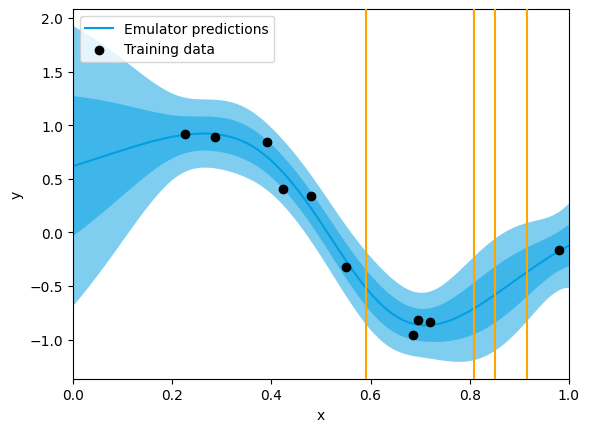

In [14]:
# Create a prediction and plot 
plt = emulator.plot(x_axis="x", y_axis="y", label="Emulator predictions", x_lim=(0, 1),verbose=True)
# Add on training data through scatterplot
plt.scatter(df["x"], df["y"], color="black", label="Training data",zorder=2)
# Loop over the recommendation dataframe
for x in range(len(points)): 
    # Plot recommendation "x points" as horizontal lines
    plt.axvline(x=points['x'].iloc[x], color="orange",zorder=3)
plt.legend()
plt.show()

These identified points, if evaluated, would increase your understanding of where your emulator's maximum is. 

### 5. Explore the parameters

#### Recommend parameters: restarts and samples

Now you can experiment with some of the non-default parameters under the hood of `emulator.recommend`. Increasing the number of random restarts for optimisation (from the default 5), and the number of raw samples that our recommend functions initalise with (from the default 128), can take longer, but scopes out more of your parameter space. 

In [15]:
# Create a recommend parameters object 
parameters = tl.RecommendParams(num_restarts=50, raw_samples=200)
# Set up the recommend run with the additional recommend
emulator.recommend(num_points=8, acq_func="explore", params=parameters, wait=False, verbose=True)

Job recommend process ID: recommend-elderly-adventurous-anglerfish


'recommend-elderly-adventurous-anglerfish'

In [18]:
# Get the recommended points with the ID generated from the recommmend function 
process_id = "<INSERT-PROCESS-ID-HERE>"
more_points, _ = emulator.get_process(process_id=process_id,verbose=True)

Recommended points:
          x
0  0.355771
1  0.799615
2  0.882475
3  0.827071
4  0.286687
5  0.545027
6  0.931546
7  0.613369
(          x
0  0.355771
1  0.799615
2  0.882475
3  0.827071
4  0.286687
5  0.545027
6  0.931546
7  0.613369, -0.005684873696527665)
Process recommend-elderly-adventurous-anglerfish results:
(          x
0  0.355771
1  0.799615
2  0.882475
3  0.827071
4  0.286687
5  0.545027
6  0.931546
7  0.613369, -0.005684873696527665)


Plot with the predictions and the new recommended points once again:

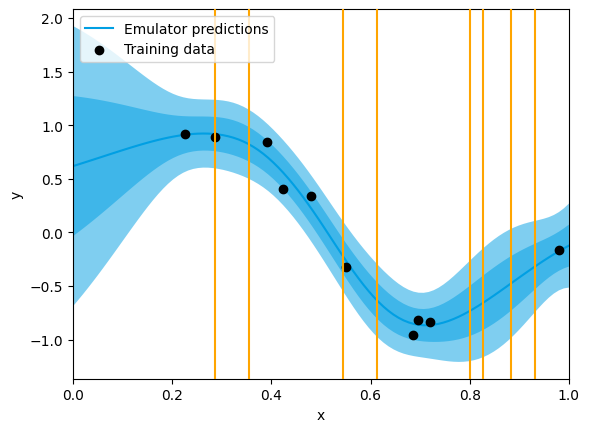

In [19]:
# Create a prediction and plot 
plt = emulator.plot(x_axis="x", y_axis="y", label="Emulator predictions", x_lim=(0, 1))
# Add on training data through scatterplot
plt.scatter(df["x"], df["y"], color="black", label="Training data",zorder=2)
# Loop over the recommendation dataframe
for x in range(len(more_points)): 
    # Plot recommendation "x points" as horizontal lines
    plt.axvline(x=more_points['x'].iloc[x], color="orange",zorder=3)
plt.legend()
plt.show()

The recommended places for further sampling, the orange lines, are exploring more of the parameter space, and identifying areas where, if there was more data given to the emulator, more information about the emulator's maximum would be known, and the overall area of uncertainty for the emulator is minimized. 

#### Recommend parameters: bounds

Next set a bound for your recommended points. 

In [20]:
# Create a recommend parameters object 
parameters = tl.RecommendParams(bounds={"x": (0.1, 0.5)})
# Set up the recommend run with the additional recommend
emulator.recommend(num_points=2, acq_func="explore", params=parameters, wait=True, verbose=True)

Job recommend process ID: recommend-concrete-plain-cougar
0:00:00: Job status: processing
0:00:01: Job status: processing
0:00:03: Job status: success
Recommended points:
         x
0  0.16803
1  0.10000


(         x
 0  0.16803
 1  0.10000,
 -0.0076383819689754785)

In [22]:
# Get the recommended points with the ID generated from the recommmend function 
process_id = "<INSERT-PROCESS-ID-HERE>"
bounded_points, _ = emulator.get_process(process_id=process_id,verbose=True)

Recommended points:
         x
0  0.16803
1  0.10000
(         x
0  0.16803
1  0.10000, -0.0076383819689754785)
Process recommend-concrete-plain-cougar results:
(         x
0  0.16803
1  0.10000, -0.0076383819689754785)


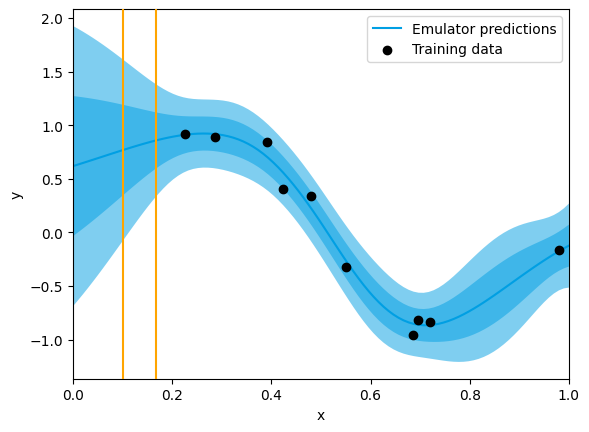

In [23]:
# Create a prediction and plot 
plt = emulator.plot(x_axis="x", y_axis="y", label="Emulator predictions", x_lim=(0, 1))
# Add on training data through scatterplot
plt.scatter(df["x"], df["y"], color="black", label="Training data",zorder=2)
# Loop over the recommendation dataframe
for x in range(len(bounded_points)): 
    # Plot recommendation "x points" as horizontal lines
    plt.axvline(x=bounded_points['x'].iloc[x], color="orange",zorder=3)
plt.legend()
plt.show()

Setting these bounds might be useful for if you know ahead of time (e.g. some physical reason or process) that you want to constrain the generation of recommended points.

Now that you know how to confidently acquire suggestions for new points, you can run these new suggested x-values through your model to acquire the associated y-values. If you retrain your emulator with these x- and y-values, you can then get an updated emulator to help inform you about how best to update your model or run your next experiment so that you are confident in your emulator's maximum. Make sure to checkout `tl.Emulator.maximize ` as well, to find the point at which you can maximize your emulator. 